# DATA3888/PHYS3888 Interdisciplinary Report: Space Run

***


## 1. Executive Summary

In the interdisciplinary unit of DATA3888/PHYS3888 (Semester 1, 2021), our team aimed to build a brain machine interface that uses machine-learning techniques to gain meaningful insights from real-time physiological measurements. In an increasingly data-driven world, there is a demand for data scientists to effectively combine, analyse and derive observations from large datasets (University of Sydney, 2021). Physicists are also required to adapt from their traditional qualitative-grounded science and apply their expertise more broadly in this data-centric era in order to contribute to modern day problems (University of Sydney, 2021). Through this interdisciplinary project, Brain_7 has introduced an innovative solution that  illustrates the concepts and skills we have learnt from our respective disciplines. In addition, the dual disciplinary team helmed by Data Science and Physics majors, worked together to utilise our strengths to a collaborative advantage. 

Our focus for Brain_7 was to design a solution that solved a modern-day social problem. Over 4.3 million Australians are estimated to have a form of disability, and over three-quarters (76.8%) of those living with a disability reported a physical disorder as their main condition (Australian Network of Disability, 2019). With these factors taken into consideration, our aim for this project was not only to demonstrate our interdisciplinary effectiveness but also, to conceptualise a solution that would actively engage the population living with mobility issues. 

The solution that we have created is Space Run, a game inspired by Space Invaders and Temple Run. The Physics students used the Brain Spikerbox and the EEG headband to detect electrical activity caused by eye movement changes. These measurements were then extracted by the Data students using a simple classifier which assessed and then categorised the eye movements into left and right. The decisions made by the simple classifier were fed into the application, allowing a user to play our creative yet simple game, Space Run. 


## 2. Aim & Methods 

### 2.1 Data Collection

**Aim**: *To obtain data for accuracy tests.*

**Applications/Equipment**:
* EEG Headband x1
* SpikerBox x1
    * USB cable x1
    * Red alligator clips x2
    * Black alligator clip x1
    * 9V battery x1
* Electrode Pad x1
* SpikeRecorder App 
* Python 

**Method**: *Obtaining data using SpikeRecorder/Python.*

1. The EEG headband was worn around the head. The two electrodes on the band were placed directly above the eyebrow and parallel to the eye.
2. An electrode pad was placed behind the ear on the bone.
3. A 9V battery was placed in the SpikerBox. One end of the three alligator clips were also connected to the SpikerBox. The SpikerBox was then connected to a computer with the USB cable. 
4. The two red alligator clips were then connected to each electrode on the headband and the black alligator clip connected to the electrode on the neck.
5. The SpikeRecorder app was opened and the SpikerBox turned on. Or otherwise Python was opened and the script ‘saver.py’ ran.
6. In SpikeRecorder settings the band pass filter was set to 8-15Hz and the notch filter set to 50Hz.
7. We recorded 3 consecutive left eye-movements. The recording and the annotation file was saved.
8. Step 7 was repeated 10 times. Each repetition was labeled numerically ie. The first recording and annotation were labeled 3L_1.
9. We then recorded 3 consecutive right eye-movements. The recording and the annotation file was saved.
10. Step 9 was repeated 10 times. Each repetition was labeled numerically ie. The first recording and annotation was labeled 3R_1.

**Method**: *Performing Left and Right Eye-Movements.*
1. The wearer of the EEG headband remained seated, sitting still and in an upright position. They were told to refrain from speaking or moving any part of their body other than their eyes.
2. Eye’s began by looking straight ahead.
3. For a left eye-movement they were told “left”. The operator of the SpikeRecorder app then pressed the spacebar simultaneously so an annotation would be recorded of when the movement occurred.
4. To move left they moved their eyes quickly from the central resting point to the furthest left point and then quickly back to central position in horizontal motion.
5. Three consecutive left eye movements were recorded in a single file with each movement occurring 3 seconds after the previous.
6. Steps 1 to 5 were repeated when recording right eye-movements. However they were cued to move with a verbal “right” and looked to the farthest right point on the horizontal.





**Aim**: *To filter and standardise the data on Python.*


**Method**: The raw data read from the SpikerBox was kept in a moving buffer. This buffer gets standardised, notch filtered at 50 Hz (electronic noise from mains power supply) and then downsampled to ~100 samples before being passed into a classifier model to be classified. The downsampling is done to ensure the classification is consistent across varying buffer sizes and also to increase performance.



### 2.2 Developed Model 
#### 2.2.1 Simple Classifier 

**Aim**: *To detect eye movements.*

**Method**: The zero-crossing heuristic is used to detect eye movements. Based on the data collected, it can be seen that when there is an eye movement, values tend to be either consecutively positive or consecutively negative, indicating that adjacent values do not cross zero, which means their product is greater than zero. In contrast, when there is no eye movement, values tend to hover around zero so adjacent values are likely to be of different signs, and thus their product is less than zero. Therefore, within a certain time interval, if the number of zero-crossing events exceeds a certain threshold, there is no eye movement, otherwise there is an eye movement. To determine the size of the time interval and the threshold for the number of zero-crossing, an optimization algorithm was used which was an aim that will be discussed later. 



**Aim**: *To identify left and right eye movements.*

**Method**: Once an eye movement is detected, whether it is left or right needs to be determined. It is obvious that the order of peak and trough was opposite for left and right eye movements. For a left eye movement, it is firstly a trough and then a peak while for a right eye movement, it is a peak followed by a trough. This allows left and right to be decided based on determining which comes first, the maximum or minimum value. If the minimum is before the maximum, it is a left eye movement, otherwise it is a right eye movement. 



**Aim**: *To prevent misidentification of events.*

**Method**:To prevent misidentifying noise as events, there were restrictions for minimum amplitude. Noise could also have some values that are away from zero but usually these values are not as large as the maximum value of an eye movement, nor as small as the minimum value of an eye movement, in other words, the amplitude of noise is not large enough. Thus restricting a minimum amplitude helps filter noise. 

To prevent the gap between two consecutive events from being mistaken for an event, there were restrictions for maximum spacing between peak and trough. If a time interval includes the second half of a previous event and the first half of a subsequent event, this interval may be misidentified as having an eye movement. For example, two left movements were made and there is a time interval between them including the second half of the first left movement, a peak, and the first half of the second left movement, a trough and then this time interval could be mistaken for an eye movement. According to the fact that in a real eye movement the spacing is small because there is no stopping while moving eyes, the maximum spacing between peak and trough is restricted to avoid the misidentification. 



**Aim**: *To optimize the classifier.*

**Method**: for simple classifier: In order to optimise the classifier, the most appropriate values need to be found for the parameters. Firstly, an accuracy measurement function is made to return 1 - accuracy. Then an optimisation algorithm scipy.optimize.minimize() which is based on the nelder-mead algorithm was used to minimise the accuracy measurement function. Basically it computes the accuracy measurement function given an initial set of parameters and uses some algorithms to determine the next set of values to test and so on. Then it chooses the set of parameters that minimises the function. As a result,  parameters that maximized the accuracy of the classifier were returned. 
The parameters that were considered to be optimized and their values were as follows: 
* Buffer time (amount of time represented in the moving buffer): 1.462
* Update factor (the fraction of the moving buffer read in through the stream): 0.1
* Wait time (wait time after classification): 0
* Number of samples (to downsample before classification): 106
* Quality factor (parameter used in notch filter): 1
* Event threshold (the threshold for the number of zero-crossing): 101
* Positive amplitude threshold: 15
* Negative amplitude threshold: 15
* Spacing (maximal spacing between peak and trough as a fraction of number of samples): 0.206


#### 2.2.2 Complex Classifier
**Aim**: *To determine whether a complex classifier is more suitable than the simple classifiers.*

**Method**: The complex classifier uses features computed by the catch22 library to train on samples. These samples were created from SpikerBox recordings using an annotations file that contains timestamps to when the eye movements occurred.


### 2.3 Evaluation Strategies 
**Aim**: *To evaluate the accuracies of classifiers.*

**Method**: A total of 23 test files were recorded using `saver.py`. 22 of which consisted of around 3 left or 3 right eye movements with the last file being a 2 minute long recording of around 33 events. Using 10-fold cross validation the accuracies per fold to produce a boxplot for each classifier. The accuracy used was the prediction accuracy of the classifier which is the percentage of predictions made by the classifier that were correct i.e. corresponded to an actual event as described by the annotation files.


**Aim**: *To evaluate the computational time (lagging) of classifiers.*

**Method**: The time taken for a classifier to return a result given processed data was recorded for all 5 models on one single test file for 1000 trials. This data produced a box plot as shown below.


## 3. Results 

### 3.1 Justification 
We have experimented with different classifiers such as the Modified Simple Classifier (MSC) Unmodified Simple Classifier (USC), K-Nearest Neighbours (KNN), Random Forest Classifier (RFC) and C Support Vector Classification (SVC). Our two main criteria for evaluating each classifier was the accuracy rate and the time it took to classify the eye movements from left and right. We prioritised accuracy and hence evaluated each model in terms of the accuracy rate they produced. The boxplot of accuracies produced above was done through a 10-fold cross validation to train and test each respective model. Each model was then evaluated against a test dataset to produce the box plots of weighted average accuracy. In addition, as shown in Figure 1,
down-sampling increases performance across all models of classification. However, for the simple classifiers it was difficult to observe a noticeable difference by down-sampling as the time it took to classify was already extremely short (<1ms).

### *Figure 1*: Effect of downsampling on performance

<!-- ![Effect of downsampling on performance](SpaceRun/diagnostics/downsampling_performance.png) -->
<img src="diagnostics/downsampling_performance.png" width="800" height="600" />

The USC gave an approximate median accuracy of 30% which was similarly seen in KNN. Both models had a slight skew towards the right and had a moderate dispersion. These were the two lowest accurate models and were hence not considered further for the deployment of our project. SVC gave a slightly higher median accuracy of approximately 50% but as shown in the Figure 2 but had a much greater spread in the accuracies recorded which caused it to be unreliable and was not considered further in terms of accuracy. RFC gave a higher median accuracy of approximately 70% and had a slight left skew whilst MSC gave a 100% accuracy rate across for most snippets of data. However, contrary to expectations, the outlier noted was due to the extended recording of eye movements.

### *Figure 2*: Streaming accuracy across models

<img src="diagnostics/streaming_boxplot.png" width="800" height="600" />

We took into consideration the two models RFC and MSC which had the highest median accuracies initially. After further discussion, we have chosen to go with MSC as the classification time for RFC was undoubtedly higher with a median of 8ms compared to MSC which classified in under 1ms as shown in the Figure 3.

### *Figure 3*: Classification performance

<img src="diagnostics/classification_performance_boxplot.png" width="800" height="600" />


### 3.2 Deployment Process 
In Figure 4 shown below, depicts a step-by-step process of how Space Run works. Through the lens of a Physics disciplinary perspective, the changes in electrical impulse when there are spontaneous changes in eye movement are detected by electrodes in the EEG headband which are connected to the SpikerBox. These readings are then fed into the computer. In line with data-science methodology, the computer then sends the raw data to a moving buffer, a window size of approximately 1.5 seconds.  The readings are then standardized by applying a 50 Hz notch filter and the classifier then determines whether the eye movements were left or right. This process is iterated continuously and hence allows the user to play the game by controlling the spaceship left and right. Whilst this process is ongoing the same computer displays and handles the game logic simultaneously. (See ***demonstration.mp4*** for a video recording).

### *Figure 4*: Project Schematic

<img src="diagnostics/schematic.png" width="800" height="450" />

Space Run is a simple game where the user controls the spaceship left and right, collecting the blue pigments of energy and avoiding the red obstacles. There are three possible lanes and if a player is in the left most lane and signals left with their eye movements. The Spaceship loops around, like a torus, moving in the right most position. 



## 4. Discussion and Conclusion 


While our model was mostly accurate following our testing, there were some shortcomings that we identified that remain as areas that can be further improved upon. In terms of raw input, we collected a sample size of recordings with most of the group members in our team and noticed slight differences in each of them when observing the recorded files. This only goes to show the nuance and adjustments that our model would need to adapt to for there to be any consideration of commercial deployment. Since our final product does not have a calibration phase before playing the game, it is only a handful of the team members’ data that is being used on what could be a novel user. Adding a calibration phase would be ideal in bypassing the small sample size by using the phase as an opportunity to collect new training data for our model whilst also adjusting the model to the specific user. 

In terms of the classification that our model provides, an ideal feature to add is the ability to recognise and classify blinks. The game we developed utilises left and right eye-movement, with the objective being to collect and dodge colour-coded obstacles. Whilst entertaining upon inception, it could potentially get boring with time due to the complexity of the game being constant. Adding the ability to blink as a control for shooting oncoming obstacles could be a viable option that brings more depth to the game and adds to its value as a product for entertainment. However, this would not linearly get complex as the game progresses, hence, it would be worth considering finding ways in which the game’s difficulty can be scaled. There is a universal timekeeping variable in the game that controls the speed of oncoming obstacles, which could be modified to scale with time as the user progresses, thus creating a challenging environment where the user is entertained and focused. But, scaling the speed of the game has major potential for breaking our game as the model currently being used utilises a 1.5-second buffer in between the classification of events, and there would eventually be a point where the user needs to give input with an interval lesser than the buffer period. This would then require further readjustment of the model to create a shorter window.

In conclusion, our product utilises a model that is robust in its accuracy as well as its efficiency when it comes to classifying eye movements. Our team was able to successfully implement a pipeline from the SpikerBox’s electrodes, with our physics team members finding effective ways of preprocessing the data with appropriate standardising and notch filtering, and in conjunction with the data science members developing a classification model trained on our team’s data and able to send input to the game’s logic with minimal latency, allowing the user to experience a game with accurate movements. For further future development, it would be ideal in finding more ways to make the game more complex and entertaining, whilst developing a method allowing for a shorter buffer period for our classifier.


### Student Contribution
480452061: Generating data, writing the code, tuning the machine, writing/editing the report

490423002:  Generating the data, tuning the machine, performing the processing, writing the code, making observations, deploying the final product and writing/editing the report

480465692:  Generating the data, writing/editing the report

490182143: Generating data, writing/editing the report

490433791: Generating data, making observations, writing/editing report


## 5. References 


1. Australian Network On Disability (2019) Disability Statistics 

        https://www.and.org.au/pages/disability-statistics.html 

2. University of Sydney (2021) DATA3888: Data Science Capstone 

        https://www.sydney.edu.au/units/DATA3888 

3. University of Sydney (2021) PHYS388: Physics Interdisciplinary Project 

        https://www.sydney.edu.au/units/PHYS3888 

## 6. Appendix

## Program Structure

The game can be played by either running python `main.py` in the SpaceRun folder or using the SpaceRun.exe executable.

# Benchmarks

The benchmarks done on a computer with a
* AMD Ryzen 5 2600X CPU
* Gigabyte NVIDIA RTX 3060 GPU
* 16 GB RAM

In [28]:
#  Benchmark code
# Imports
import time
from typing import Dict, List
import numpy as np
import yaml
from scipy import signal
from matplotlib import pyplot as plt
import os
import pickle

from aliases import FilePath
from models import *
from utils import parse_snippet

In [29]:
# Create diagnostics folder
DIAGNOSTICS_FOLDER: FilePath = "diagnostics"
if not os.path.isdir(DIAGNOSTICS_FOLDER):
    os.mkdir(DIAGNOSTICS_FOLDER)

In [30]:
# Timing function
def time_model(model: ModelBase, num_trials: int) -> List[int]:
    performance_times: List[int] = []
    for _ in range(num_trials):
        start_time: int = time.perf_counter_ns()
        _ = model.classify(test_data)
        final_time: int = time.perf_counter_ns()
        performance_times.append((final_time - start_time) // 1e6)
    return performance_times

# Classification performance across models

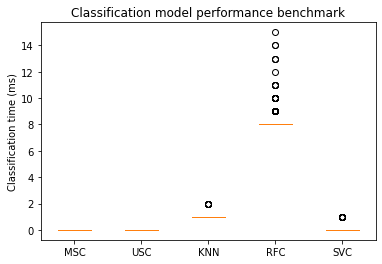

In [31]:
# Load from cache
classification_performance_flag = False
classification_performance_cache: FilePath = f"{DIAGNOSTICS_FOLDER}/classification_performance.pickle"
if os.path.isfile(classification_performance_cache):
    with open(classification_performance_cache, "rb") as handle:
        accuracy_data = pickle.load(handle)
        plt.boxplot(accuracy_data.values(), labels=["MSC", "USC", "KNN", "RFC", "SVC"])
        plt.ylabel("Classification time (ms)")
        plt.title("Classification model performance benchmark");
        classification_performance_flag = True

In [32]:
# Process if cache does not exist
if not classification_performance_flag:
    # Load SpikerBox parameters
    CONFIG_PATH: FilePath = "settings/spiker_box.srconfig"
    with open(CONFIG_PATH, "r") as config_file:
        config_data: Dict = yaml.safe_load(config_file)
        # SpikerBox arguments
        buffer_time: float = float(config_data["buffer_time"])
        update_factor: float = float(config_data["update_factor"])
        wait_time: float = float(config_data["wait_time"])
        num_samples: int = int(config_data["num_samples"])
        quality_factor: float = float(config_data["quality_factor"])
        # Modified simple classifier parameters
        m_event_threshold: int = int(config_data["classifier"]["MSC"]["event_threshold"])
        positive_amplitude: float = float(config_data["classifier"]["MSC"]["positive_amplitude"])
        negative_amplitude: float = float(config_data["classifier"]["MSC"]["negative_amplitude"])
        spacing: float = float(config_data["classifier"]["MSC"]["spacing"])
        # Simple classifier parameters
        s_event_threshold: int = int(config_data["classifier"]["USC"]["event_threshold"])
        # Catch22 model paths
        knn_path: FilePath = config_data["classifier"]["KNN"]["file_path"]
        rfc_path: FilePath = config_data["classifier"]["RFC"]["file_path"]
        svc_path: FilePath = config_data["classifier"]["SVC"]["file_path"]

In [33]:
if not classification_performance_flag:
    # Initialise models
    modified_model: ModelBase = ModifiedModel(m_event_threshold, positive_amplitude, negative_amplitude, spacing)
    simple_model: ModelBase = SimpleModel(s_event_threshold)
    knn_model: ModelBase = Catch22Model.create_from_file(knn_path)
    rfc_model: ModelBase = Catch22Model.create_from_file(rfc_path)
    svc_model: ModelBase = Catch22Model.create_from_file(svc_path)

In [34]:
if not classification_performance_flag:
    TEST_FILE: FilePath = "snippets/left1_left_1.npy"
    # Load snippet
    signal_slice, _ = parse_snippet(np.load(TEST_FILE))
    # Standardise and downsample signal
    test_data: np.ndarray = signal.resample(signal_slice, num_samples)
    # Number of trials
    num_trials: int = int(1e3)

In [35]:
if not classification_performance_flag:
    # Compute times
    classification_times: Dict[ModelType, List[int]] = {}
    classification_times[ModelType.MSC] = time_model(modified_model, num_trials)
    classification_times[ModelType.USC] = time_model(simple_model, num_trials)
    classification_times[ModelType.KNN] = time_model(knn_model, num_trials)
    classification_times[ModelType.RFC] = time_model(rfc_model, num_trials)
    classification_times[ModelType.SVC] = time_model(svc_model, num_trials)

In [36]:
if not classification_performance_flag:
    # Boxplot
    plt.boxplot(classification_times.values(), labels=["MSC", "USC", "KNN", "RFC", "SVC"])
    plt.ylabel("Classification time (ms)")
    plt.title("Classification model performance benchmark");
    if not os.path.isfile(f"{DIAGNOSTICS_FOLDER}/classification_performance_boxplot.png"):
        plt.savefig(f"{DIAGNOSTICS_FOLDER}/classification_performance_boxplot.png")

In [37]:
# Save to cache
if not classification_performance_flag and not os.path.isfile(classification_performance_cache):
    with open(classification_performance_cache, "wb") as handle:
        pickle.dump(classification_times, handle, protocol=pickle.DEFAULT_PROTOCOL)

# Downsampling and Performance

In [38]:
# Initialise
number_of_samples = np.arange(10, 1000, 100);

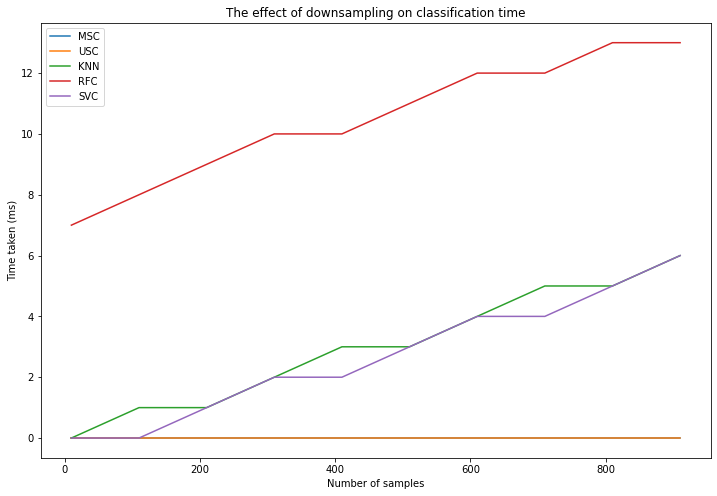

In [39]:
# Load from cache
downsampling_performance_flag = False
downsampling_performance_cache: FilePath = f"{DIAGNOSTICS_FOLDER}/downsampling_performance.pickle"
if os.path.isfile(downsampling_performance_cache):
    with open(downsampling_performance_cache, "rb") as handle:
        loaded_times = pickle.load(handle)
        plt.figure(figsize=(12, 8))
        for key in loaded_times:
            plt.plot(number_of_samples, loaded_times[key])
        plt.legend(loaded_times.keys())
        plt.xlabel("Number of samples")
        plt.ylabel("Time taken (ms)")
        plt.title("The effect of downsampling on classification time")
        downsampling_performance_flag = True

In [40]:
# Process if cache does not exist
if not downsampling_performance_flag:
    sample_times: Dict[ModelType, List[int]] = {
        ModelType.MSC: [],
        ModelType.USC: [],
        ModelType.KNN: [],
        ModelType.RFC: [],
        ModelType.SVC: [],
    }
    for idx, num in enumerate(number_of_samples):
        # Standardise and downsample signal
        test_data: np.ndarray = signal.resample(signal_slice, num)
        # MSC
        msc_times = time_model(modified_model, num_trials, test_data)
        sample_times[ModelType.MSC].append(np.median(msc_times))
        # USC
        usc_times = time_model(simple_model, num_trials, test_data)
        sample_times[ModelType.USC].append(np.median(usc_times))
        # KNN
        knn_times = time_model(knn_model, num_trials, test_data)
        sample_times[ModelType.KNN].append(np.median(knn_times))
        # RFC
        rfc_times = time_model(rfc_model, num_trials, test_data)
        sample_times[ModelType.RFC].append(np.median(rfc_times))
        # SVC
        svc_times = time_model(svc_model, num_trials, test_data)
        sample_times[ModelType.SVC].append(np.median(svc_times))
    
    # Plot
    plt.figure(figsize=(12, 8))
    for key in sample_times:
        plt.plot(number_of_samples, sample_times[key])
    plt.legend(sample_times.keys())
    plt.xlabel("Number of samples")
    plt.ylabel("Time taken (ms)")
    plt.title("The effect of downsampling on classification time")
    if not os.path.isfile(f"{DIAGNOSTICS_FOLDER}/downsampling_performance.png"):
        plt.savefig(f"{DIAGNOSTICS_FOLDER}/downsampling_performance.png");

    # Save to cache
    if not os.path.isfile(downsampling_performance_cache):
        with open(downsampling_performance_cache, "wb") as handle:
            pickle.dump(sample_times, handle, protocol=pickle.DEFAULT_PROTOCOL)

# Streaming accuracy

In [41]:
# Imports
# Standard modules
from typing import Dict, NamedTuple, List, Tuple
import os
import pickle
import glob

# External modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import yaml

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Internal modules
from aliases import *
from models import *
from snippet_accuracy import calculate_snippet_accuracy
from streaming_accuracy import calculate_streaming_accuracy, DataSample, load_data_samples
from train_models import Snippets, load_snippet_files, process_snippets

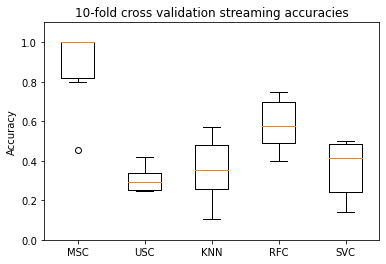

In [42]:
# Load from cache
streaming_accuracies_cache: FilePath = f"{DIAGNOSTICS_FOLDER}/streaming_accuracies.pickle"
streaming_accuracy_flag: bool = False
if os.path.isfile(streaming_accuracies_cache):
    with open(streaming_accuracies_cache, "rb") as handle:
        accuracy_data = pickle.load(handle)
        plt.boxplot(accuracy_data.values(), labels=["MSC", "USC", "KNN", "RFC", "SVC"])
        plt.ylim(0, 1.1);
        plt.ylabel("Accuracy")
        plt.title("10-fold cross validation streaming accuracies")
        streaming_accuracy_flag: bool = True

In [43]:
if not streaming_accuracy_flag:
    # Load timestamp data
    CLASSIFICATION_FILE: FilePath = "recordings/Actual Event Times.csv"
    df: pd.DataFrame = pd.read_csv(CLASSIFICATION_FILE)
    data: List[DataSample] = load_data_samples(CLASSIFICATION_FILE)
    
    # 10-fold cross validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    
    # Load SpikerBox parameters
    CONFIG_PATH: FilePath = "settings/spiker_box.srconfig"
    with open(CONFIG_PATH, "r") as config_file:
        config_data: Dict = yaml.safe_load(config_file)
        # SpikerBox arguments
        buffer_time: float = float(config_data["buffer_time"])
        update_factor: float = float(config_data["update_factor"])
        wait_time: float = float(config_data["wait_time"])
        num_samples: int = int(config_data["num_samples"])
        quality_factor: float = float(config_data["quality_factor"])
        # Modified simple classifier parameters
        m_event_threshold: int = int(config_data["classifier"]["MSC"]["event_threshold"])
        positive_amplitude: float = float(config_data["classifier"]["MSC"]["positive_amplitude"])
        negative_amplitude: float = float(config_data["classifier"]["MSC"]["negative_amplitude"])
        spacing: float = float(config_data["classifier"]["MSC"]["spacing"])
        # Simple classifier parameters
        s_event_threshold: int = int(config_data["classifier"]["USC"]["event_threshold"])
        # Catch22 model paths
        knn_path: FilePath = config_data["classifier"]["KNN"]["file_path"]
        rfc_path: FilePath = config_data["classifier"]["RFC"]["file_path"]
        svc_path: FilePath = config_data["classifier"]["SVC"]["file_path"]

    # Snippets folder
    SNIPPET_FOLDER: FilePath = "snippets"

In [44]:
# Tests simple models that don't require training
def test_simplemodel_streaming(model: ModelBase, kfold: KFold) -> List[float]:
    # Initialise model accuracy list
    accuracies: List[float] = []
    # Evaluate k-fold accuracy
    for count, (train, test) in enumerate(kfold.split(data)):
        _train_data: List[DataSample] = [sample for idx, sample in enumerate(data) if idx in train]
        test_data: List[DataSample] = [sample for idx, sample in enumerate(data) if idx in test]

        # Get accuracy
        trial_accuracy: float = calculate_streaming_accuracy(
            test_data,
            model,
            True,
            buffer_time,
            update_factor,
            wait_time,
            num_samples,
            quality_factor,
        )
        # Append
        accuracies.append(trial_accuracy)
        # Iterate
        print(f"Finished trial {count+1}")
        count += 1
    return accuracies

In [45]:
# Trains the complex classifiers on the given training data
def train_catch22model(untrained_model: SupportsPredict, training_files: List[FilePath]) -> Catch22Model:
    train_data: List[FilePath] = []
    for file_path in training_files:
        _, tail = os.path.split(file_path)
        tail = tail.rstrip(".npy")
        for train_path in glob.glob(f"{SNIPPET_FOLDER}/{tail}_*"):
            train_data.append(train_path)
    snippets: Snippets = load_snippet_files({}, train_data)
    snippet_data, labels = process_snippets(snippets, num_samples)
    untrained_model.fit(snippet_data, labels)
    return Catch22Model(untrained_model)

In [46]:
# Evaluates the accuracy of the complex classifier
def test_catch22model_streaming(data: List[DataSample], kfold: KFold, model_type: ModelType) -> List[float]:
    accuracies: List[float] = []
    # Evaluate k-fold accuracy
    for count, (train, test) in enumerate(kfold.split(data)):
        # Train model
        training_files: List[FilePath] = [sample.file_name for idx, sample in enumerate(data) if idx in train]
        untrained_model: SupportsPredict;
        if model_type == ModelType.KNN:
            untrained_model = KNeighborsClassifier(n_neighbors=5)
        elif model_type == ModelType.RFC:
            untrained_model = RandomForestClassifier(n_estimators=100)
        elif model_type == ModelType.SVC:
            untrained_model = svm.SVC()
        model: Catch22Model = train_catch22model(untrained_model, training_files)
        # Test data
        test_data: List[DataSample] = [sample for idx, sample in enumerate(data) if idx in test]

        # Get accuracy
        trial_accuracy: float = calculate_streaming_accuracy(
            test_data,
            model,
            True,
            buffer_time,
            update_factor,
            wait_time,
            num_samples,
            quality_factor,
        )
        # Append
        accuracies.append(trial_accuracy)
        # Iterate
        print(f"Finished trial {count+1}")
        count += 1
    return accuracies

In [47]:
if not streaming_accuracy_flag:
    # Initialise storage
    streaming_accuracies: Dict[ModelType, List[float]] = {}

In [48]:
if not streaming_accuracy_flag:
    # Modified simple classifier
    # Model parameters
    model_parameters: List[float] = [
        m_event_threshold,
        positive_amplitude,
        negative_amplitude,
        spacing,
    ]
    # Initialise model
    model: ModelBase = ModifiedModel(*model_parameters)
    # Initialise model accuracy list
    accuracies: List[float] = test_simplemodel_streaming(model, kfold)
    # Set new value
    streaming_accuracies[ModelType.MSC] = accuracies
    print(np.median(accuracies))

In [49]:
if not streaming_accuracy_flag:
    # Simple classifier
    # Initialise model
    model: ModelBase = SimpleModel(s_event_threshold)
    # Initialise model accuracy list
    accuracies: List[float] = test_simplemodel_streaming(model, kfold)
    # Set new value
    streaming_accuracies[ModelType.USC] = accuracies
    print(np.median(accuracies))

In [50]:
if not streaming_accuracy_flag:
    # KNN
    accuracies: List[float] = test_catch22model_streaming(data, kfold, ModelType.KNN)
    # Set new value
    streaming_accuracies[ModelType.KNN] = accuracies
    print(np.median(accuracies))

In [51]:
if not streaming_accuracy_flag:
    # RFC
    accuracies: List[float] = test_catch22model_streaming(data, kfold, ModelType.RFC)
    # Set new value
    streaming_accuracies[ModelType.RFC] = accuracies
    print(np.median(accuracies))

In [52]:
if not streaming_accuracy_flag:
    # SVC
    accuracies: List[float] = test_catch22model_streaming(data, kfold, ModelType.SVC)
    # Set new value
    streaming_accuracies[ModelType.SVC] = accuracies
    print(np.median(accuracies))

In [53]:
if not streaming_accuracy_flag:
    # Boxplot comparing all the accuracies across models
    plt.boxplot(streaming_accuracies.values(), labels=["MSC", "USC", "KNN", "RFC", "SVC"])
    plt.ylim(0, 1.1);
    plt.ylabel("Accuracy")
    plt.title("10-fold cross validation streaming accuracies")
    if not os.path.isfile(f"{DIAGNOSTICS_FOLDER}/streaming_boxplot.png"):
        plt.savefig(f"{DIAGNOSTICS_FOLDER}/streaming_boxplot.png");

In [54]:
# Save to cache
if not streaming_accuracy_flag and not os.path.isfile(streaming_accuracies_cache):
    with open(streaming_accuracies_cache, "wb") as handle:
        pickle.dump(streaming_accuracies, handle)

# Extra information

See the README.md for more information on how to use all the scripts in **SpaceRun**.